<a href="https://colab.research.google.com/github/shikha1603/Crowd-Prediction-/blob/main/crowd_density_prediction_system_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gen 0: Loss = 3282.4037
Gen 10: Loss = 2825.6692
Gen 20: Loss = 2375.1066
Gen 30: Loss = 1789.4001
Gen 40: Loss = 1228.8126
Gen 50: Loss = 776.4939
Gen 60: Loss = 444.2706
Gen 70: Loss = 262.5550
Gen 80: Loss = 216.3850
Gen 90: Loss = 201.2202

Predictions vs Actual:
Predicted: 37.53, Actual: 45.00
Predicted: 57.09, Actual: 75.00
Predicted: 75.16, Actual: 90.00
Predicted: 46.70, Actual: 30.00
Predicted: 66.02, Actual: 65.00
Predicted: 85.35, Actual: 85.00
Predicted: 30.56, Actual: 25.00
Predicted: 50.13, Actual: 55.00
Predicted: 66.78, Actual: 40.00


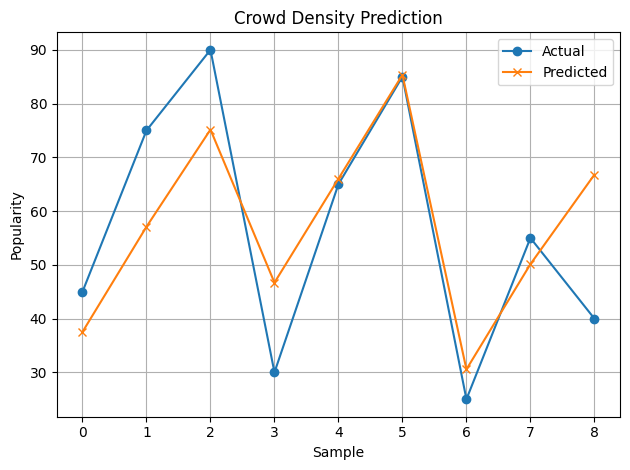

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#data
data = [
    # [hour, day_of_week, rating, user_ratings_total, current_popularity]
    [10, 2, 4.5, 1200, 45],
    [14, 2, 4.5, 1200, 75],
    [18, 2, 4.5, 1200, 90],
    [10, 2, 4.8, 2500, 30],
    [14, 2, 4.8, 2500, 65],
    [18, 2, 4.8, 2500, 85],
    [10, 2, 4.3, 800, 25],
    [14, 2, 4.3, 800, 55],
    [18, 2, 4.3, 800, 40],
]

data = np.array(data, dtype=float)
X = data[:, :4]
y = data[:, 4:]

X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)

#Neural Network
def relu(x):
    return np.maximum(0, x)

def forward_pass(X, weights):
    w1, b1, w2, b2 = weights
    z1 = relu(np.dot(X, w1) + b1)
    z2 = np.dot(z1, w2) + b2
    return z2

def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Genetic Algorithm
def initialize_population(input_size, hidden_size, output_size, pop_size):
    population = []
    for _ in range(pop_size):
        w1 = np.random.randn(input_size, hidden_size)
        b1 = np.random.randn(1, hidden_size)
        w2 = np.random.randn(hidden_size, output_size)
        b2 = np.random.randn(1, output_size)
        population.append([w1, b1, w2, b2])
    return population

def mutate(weights, mutation_rate=0.1):
    return [w + mutation_rate * np.random.randn(*w.shape) for w in weights]

def crossover(w1, w2):
    return [(a + b) / 2 for a, b in zip(w1, w2)]

def genetic_algorithm(X, y, input_size, hidden_size, output_size, pop_size=10, generations=100):
    population = initialize_population(input_size, hidden_size, output_size, pop_size)

    for gen in range(generations):
        losses = [compute_loss(y, forward_pass(X, w)) for w in population]
        ranked = sorted(zip(losses, population), key=lambda x: x[0])
        best = ranked[:2]

        new_population = [w for _, w in best]

        while len(new_population) < pop_size:
            parent1 = best[0][1]
            parent2 = best[1][1]
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population
        if gen % 10 == 0:
            print(f"Gen {gen}: Loss = {ranked[0][0]:.4f}")

    return ranked[0][1]

best_weights = genetic_algorithm(X, y, input_size=4, hidden_size=6, output_size=1)

predictions = forward_pass(X, best_weights)

print("\nPredictions vs Actual:")
for pred, actual in zip(predictions.flatten(), y.flatten()):
    print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")

plt.plot(range(len(y)), y, label='Actual', marker='o')
plt.plot(range(len(predictions)), predictions, label='Predicted', marker='x')
plt.title("Crowd Density Prediction")
plt.xlabel("Sample")
plt.ylabel("Popularity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
# --- Interface to Predict Crowd Density ---
def predict_crowd_density(hour, day_of_week, rating, user_ratings_total, weights):
    input_data = np.array([[hour, day_of_week, rating, user_ratings_total]], dtype=float)
    input_data = (input_data - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)
    prediction = forward_pass(input_data, weights)
    return prediction[0][0]

print("\n--- Crowd Density Checker ---")
while True:
    try:
        hour = float(input("Enter hour (0–23): "))
        day_of_week = float(input("Enter day of week (0=Sun, ..., 6=Sat): "))
        rating = float(input("Enter Google rating (e.g. 4.5): "))
        user_ratings_total = float(input("Enter total user ratings (e.g. 1200): "))

        predicted_popularity = predict_crowd_density(hour, day_of_week, rating, user_ratings_total, best_weights)
        print(f"\n🔮 Predicted Crowd Density: {predicted_popularity:.2f}\n")

        cont = input("Try again? (y/n): ")
        if cont.lower() != 'y':
            break
    except Exception as e:
        print(f"⚠️ Error: {e}")
        break



--- Crowd Density Checker ---
Enter hour (0–23): 15
Enter day of week (0=Sun, ..., 6=Sat): 5
Enter Google rating (e.g. 4.5): 3.5
Enter total user ratings (e.g. 1200): 1000

🔮 Predicted Crowd Density: 9895030918.09

Try again? (y/n): n
